In [1]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv(r"C:\Users\Workstation X\Desktop\ICT\Case study on Regression\car_age_price.csv")
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [ ]:
## 2. Pre-processing steps

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
data.head(3)

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000


In [6]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [7]:
data.shape

(112, 2)

In [8]:
data.nunique()

Year      8
Price    35
dtype: int64

In [9]:
## Checking if there are null values

data.isnull().sum()

Year     0
Price    0
dtype: int64

In [10]:
## Additional check to find out missing values

columns_with_missing_values = data.columns[data.isna().any()].tolist()

print("Columns with missing values:")
for column in columns_with_missing_values:
    print(column)

Columns with missing values:


In [ ]:
## There are no null or missing values.

<Axes: xlabel='Year'>

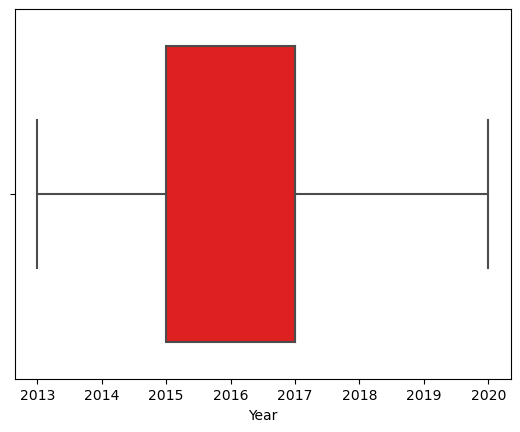

In [18]:
## Outlier analysis
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Year',data=data, color='r')

In [ ]:
## From the above box plot we can see that there aren't any outliers.

In [70]:
#  Find the best linear relationship between year and price.

X = data[['Year']]  # Feature variable
y = data['Price']   # Target variable

In [71]:
## Splitting the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)


In [80]:
## Build and Train the Liner Regression model

from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [73]:
print(model.intercept_,model.coef_)

-95520922.49198584 [47608.56780808]


In [74]:
## Make predictions and evaluate the model.

from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print(f'R-squared: {r2:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root of mean squared error: {rmse:.2f}')


R-squared: 0.37
Mean Squared Error: 4326906256.83
Root of mean squared error: 65779.22


In [ ]:
## R-squared is 0.37 
## indicating that the linear regression model explains 37% of the variance in the target variable, "Price".

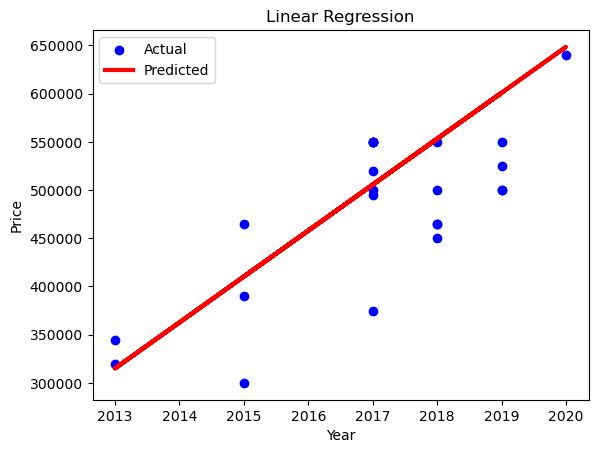

In [25]:
## Visualise the Linear regression line

import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Predicted')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.title('Linear Regression')
plt.show()


In [75]:
## Can you predict the possible price of a 2022 model second-hand grand i10? 

## We have got m= 47608.56780808 and c = -95520922.49198584
## Manually calculating using the equation

m= 47608.56780808 
c = -95520922.49198584

y= m*2022 + c
print(f"The predicted price for year 2022 is: {y:0.2f}")

The predicted price for year 2022 is: 743601.62


In [76]:
## Checking with data

x_new = pd.DataFrame({'Year':[2022]})
x_new.head()

,Year
0,2022


In [77]:
y_pred_new = model.predict(x_new)
print(f'The predicted price for year 20222 is: {y_pred_new[0]:.2f}')

The predicted price for year 20222 is: 743601.62


In [81]:
# Please learn about lasso regression and create a model.


## Create and Train the Lasso Regression model

from sklearn.linear_model import Lasso

# Create a Lasso regression model
model = Lasso(alpha=1.0)  # can adjust the alpha (regularization strength)

# Train the model on the training data
model.fit(X_train, y_train)

Lasso()

In [44]:
## Making Predictions

y_pred1 = model.predict(X_test)

In [79]:
## Evaluating the model

from sklearn.metrics import r2_score, mean_squared_error

r1 = r2_score(y_test, y_pred1)
mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = sqrt(mse)

print(f'R-squared: {r1:.2f}')
print(f'Mean Squared Error: {mse1:.2f}')
print(f'Root of Mean Squared Error: {rmse1:.2f}')

R-squared: 0.37
Mean Squared Error: 4326859771.02
Root of Mean Squared Error: 65779.22


In [ ]:
## Since both methods have nearly identical R-squared values and RMSE values,
## it suggests that they are performing similarly on this dataset.

## Lower MSE values indicate a better fit of the model to the data, meaning it makes more accurate predictions.